In [66]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

numjobs_all = pd.read_csv('../numjobs_all.csv')
numjobs_all.drop('Unnamed: 0',axis = 1,inplace = True)

In [71]:
mean_jobs_tools = numjobs_all.groupby(['tool_name_version']).mean()
mean_jobs_tools.reset_index(inplace = True)
mean_jobs_tools.sort_values(by = 'num_jobs',ascending = False,inplace = True)
ten_most_popular_tools_mean_jobs = mean_jobs_tools.head(10)
ten_most_popular_tools_mean_jobs.rename(columns = {'num_jobs':'avg_jobs'},inplace = True)
ten_most_popular_tools_mean_jobs.to_csv('ten_most_popular_tools_avg_numjobs.csv',index = False)

C:\Users\peiyu\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<BarContainer object of 10 artists>

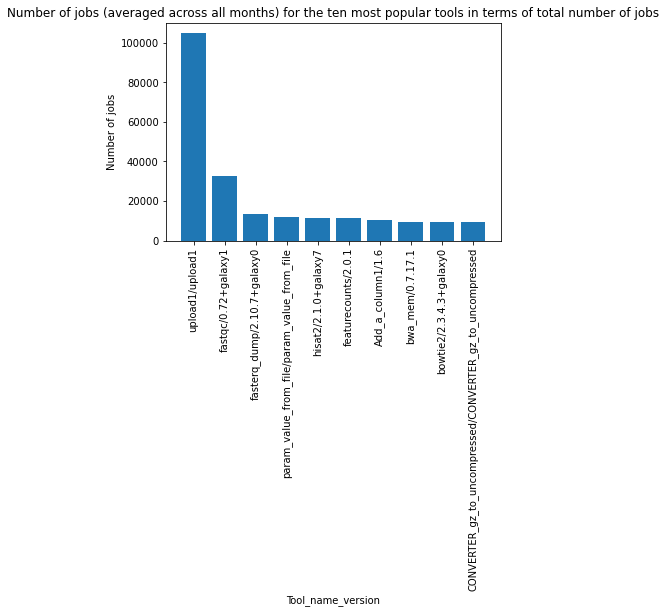

In [52]:
ten_most_popular_tools_jobs = mean_jobs_tools.head(10)
import matplotlib.pyplot as plt

most_popular_tool_names = ten_most_popular_tools_jobs.tool_name_version.values
most_popular_tool_names_jobs = ten_most_popular_tools_jobs.num_jobs.values
plt.title('Number of jobs (averaged across all months) for the ten most popular tools in terms of total number of jobs')
plt.ylabel('Number of jobs')
plt.xlabel('Tool_name_version')
plt.xticks(rotation = 90)
plt.bar(most_popular_tool_names,most_popular_tool_names_jobs)

In [53]:
#mean_jobs_tools = group_tools.apply(lambda x: x['num_jobs'].mean())

#mean_jobs_tools.sort_values(ascending = False,inplace = True)

## ten most popular tools in terms of the average number of jobs
#ten_most_popular_tools = list(mean_jobs_tools[:10].index)
#print(ten_most_popular_tools)

'''avg_jobs_ten_most_popular_tools = list(mean_jobs_tools[:10])
avg_jobs_ten_most_popular_tools

#ten_most_popular_tools = [tool.split('/')[0] for tool in ten_most_popular_tools]
#print(ten_most_popular_tools)
ten_most_popular_tools_data = zip(ten_most_popular_tools,avg_jobs_ten_most_popular_tools)
for tool_name, tool_avg_jobs in ten_most_popular_tools_data:
    print(f'tool name is {tool_name}')
    print('average number of jobs is {:.3f}\n'.format(tool_avg_jobs))'''

"avg_jobs_ten_most_popular_tools = list(mean_jobs_tools[:10])\navg_jobs_ten_most_popular_tools\n\n#ten_most_popular_tools = [tool.split('/')[0] for tool in ten_most_popular_tools]\n#print(ten_most_popular_tools)\nten_most_popular_tools_data = zip(ten_most_popular_tools,avg_jobs_ten_most_popular_tools)\nfor tool_name, tool_avg_jobs in ten_most_popular_tools_data:\n    print(f'tool name is {tool_name}')\n    print('average number of jobs is {:.3f}\n'.format(tool_avg_jobs))"

In [54]:
'''import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
ten_most_popular_tool_names = [tool.split('/')[0] for tool in ten_most_popular_tools]
plt.bar(ten_most_popular_tool_names,avg_jobs_ten_most_popular_tools)
plt.title('Average jobs[across January 2020 to May 2021] for the 10 most popular tools')
plt.xlabel('tool_name')
plt.ylabel('avg number of jobs')
plt.grid(axis="both")
plt.xticks(rotation = 90)
plt.savefig('avg_num_jobs_10_mostpopular_tools.png')
#print("current files are ")'''

#for file in os.listdir():
#  print(file)

'import matplotlib.pyplot as plt\nplt.figure(figsize = (5,5))\nten_most_popular_tool_names = [tool.split(\'/\')[0] for tool in ten_most_popular_tools]\nplt.bar(ten_most_popular_tool_names,avg_jobs_ten_most_popular_tools)\nplt.title(\'Average jobs[across January 2020 to May 2021] for the 10 most popular tools\')\nplt.xlabel(\'tool_name\')\nplt.ylabel(\'avg number of jobs\')\nplt.grid(axis="both")\nplt.xticks(rotation = 90)\nplt.savefig(\'avg_num_jobs_10_mostpopular_tools.png\')\n#print("current files are ")'

<p align= "justify">
Creating the csv files of the total cpu time for each of the 10 most popular Galaxy tools in terms of their job requirements
</p>

In [55]:
total_cpu_time_all = pd.read_csv('../total_cpu_time_all.csv')

tool_group = total_cpu_time_all.groupby(['tool_name_version'])

for tool in most_popular_tool_names:
    total_cpu_time_tool = tool_group.get_group(tool)
    total_cpu_time_tool.set_index('tool_name_version',inplace = True)
    filename = 'total_cpu_time_' + tool.split('/')[0]+'.csv'
    #os.chdir(path)
    file_path = os.path.join(os.getcwd(),'resource_requirements_ten_most_popular_tools_by_jobs','total_cpu_time',filename)
    total_cpu_time_tool.to_csv(file_path,index = False)
    #os.chdir('C:\\myfiles\\Spring2022\\usage-metering\\data\\MostPopularTools')

<p align= "justify">
Creating the csv files of the total cpu time for each of the 10 most popular Galaxy tools in terms of their job requirements
</p>

In [56]:
total_memory_all = pd.read_csv('../totalmemory_all.csv')

tool_group = total_memory_all.groupby(['tool_name_version'])

for tool in most_popular_tool_names:
    total_memory_tool = tool_group.get_group(tool)
    total_memory_tool.set_index('tool_name_version',inplace = True)
    filename = 'total_memory_' + tool.split('/')[0] + '.csv'
    file_path = os.path.join(os.getcwd(),'resource_requirements_ten_most_popular_tools_by_jobs','total_memory',filename)
    total_memory_tool.to_csv(file_path,index = False)
    #os.chdir('C:\\myfiles\\Spring2022\\usage-metering\\data\\MostPopularTools')

In [57]:
avgmemory_all = pd.read_csv('../avg_memory_all.csv')

tool_group = avgmemory_all.groupby(['tool_name_version'])

for tool in most_popular_tool_names:
    avg_memory_tool = tool_group.get_group(tool)
    avg_memory_tool.set_index('tool_name_version',inplace = True)
    filename = 'avgmemory_' + tool.split('/')[0] + '.csv'
    file_path = os.path.join(os.getcwd(),'resource_requirements_ten_most_popular_tools_by_jobs','avg_memory',filename)
    #os.chdir(path)
    avg_memory_tool.to_csv(file_path,index = False)
    #os.chdir('C:\\myfiles\\Spring2022\\usage-metering\\data\\MostPopularTools')

In [58]:
avg_cpu_time_all = pd.read_csv('../avg_cpu_time_all.csv')

tool_group = avg_cpu_time_all.groupby(['tool_name_version'])

for tool in most_popular_tool_names:
    avg_cpu_time_tool = tool_group.get_group(tool)
    avg_cpu_time_tool.set_index('tool_name_version',inplace = True)
    filename = 'avgcputime_' + tool.split('/')[0] + '.csv'
    file_path = os.path.join(os.getcwd(),'resource_requirements_ten_most_popular_tools_by_jobs','avg_cpu_time',filename)
    #os.chdir(path)
    avg_cpu_time_tool.to_csv(file_path,index = False)
    #os.chdir('C:\\myfiles\\Spring2022\\usage-metering\\data\\MostPopularTools')

<p align = "justify">
Below is the plots of the total memory over time for the 10 most popular Galaxy tools in terms of the number of jobs.
</p>

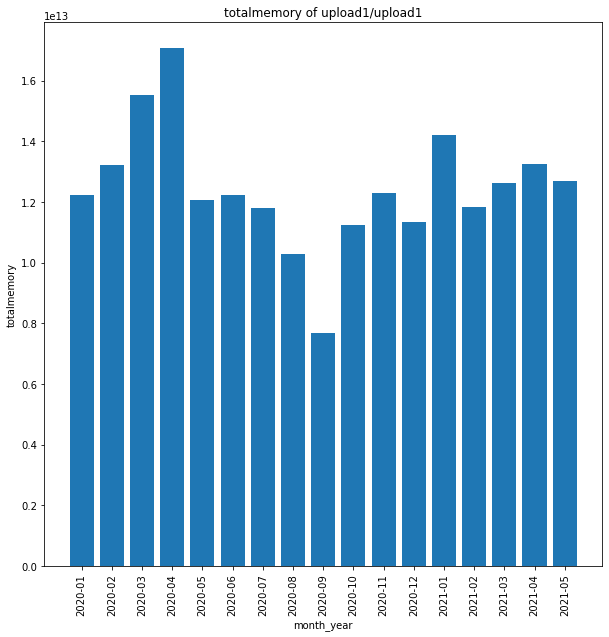

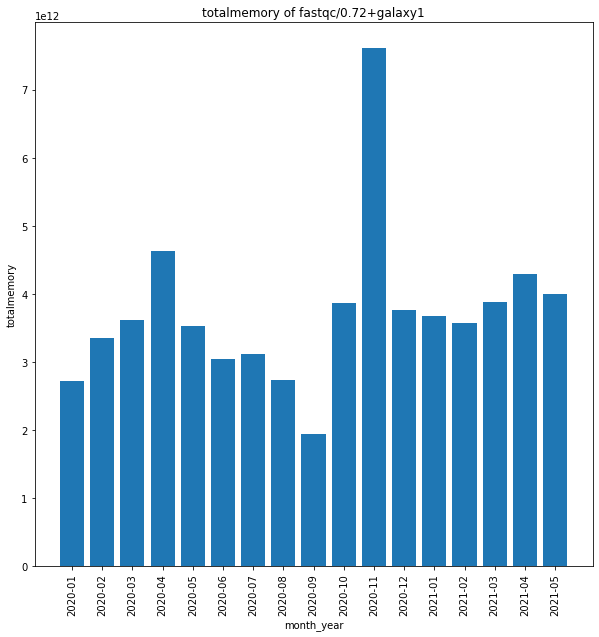

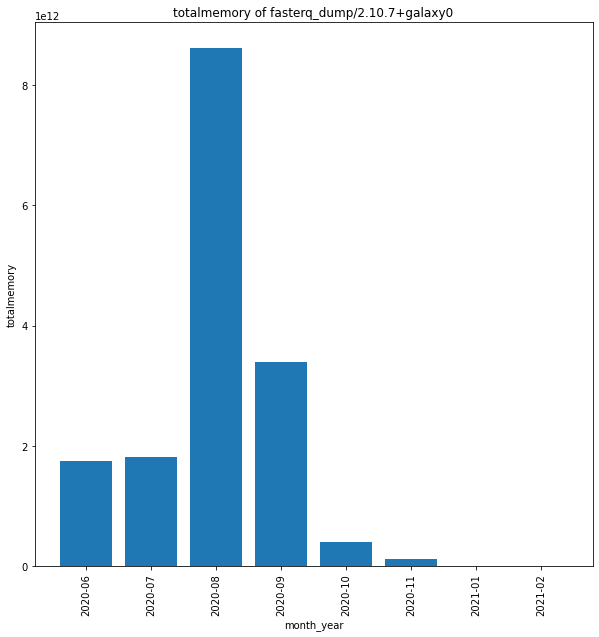

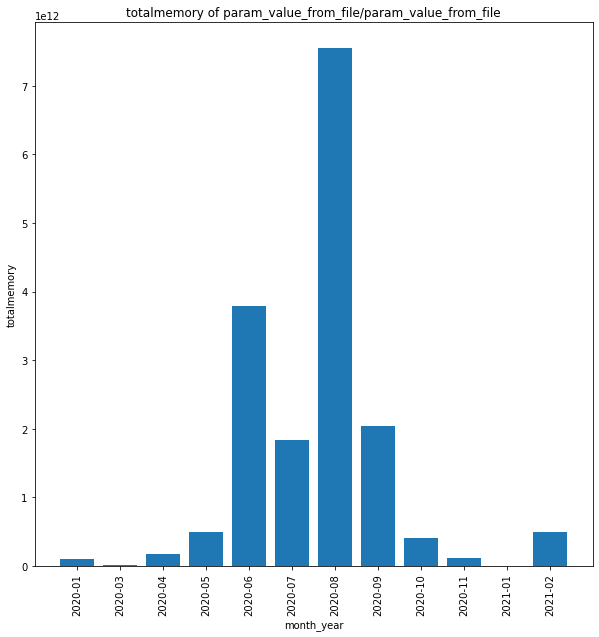

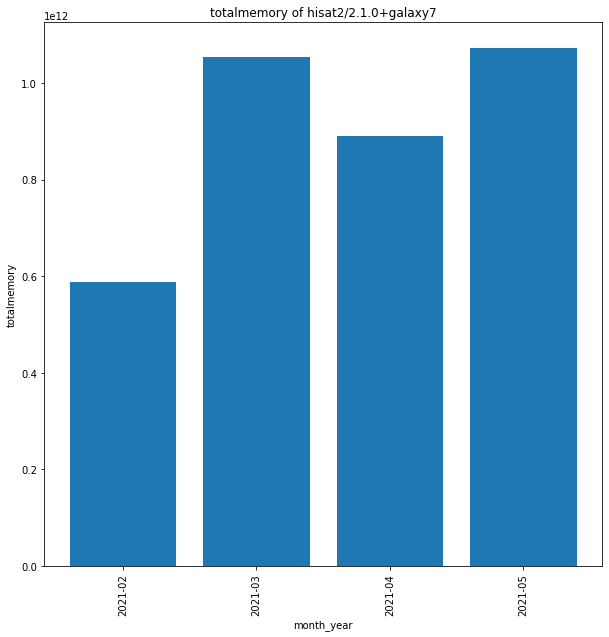

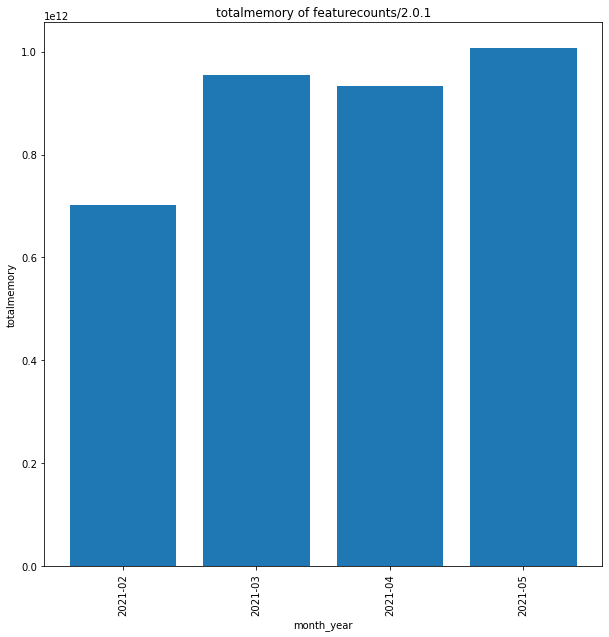

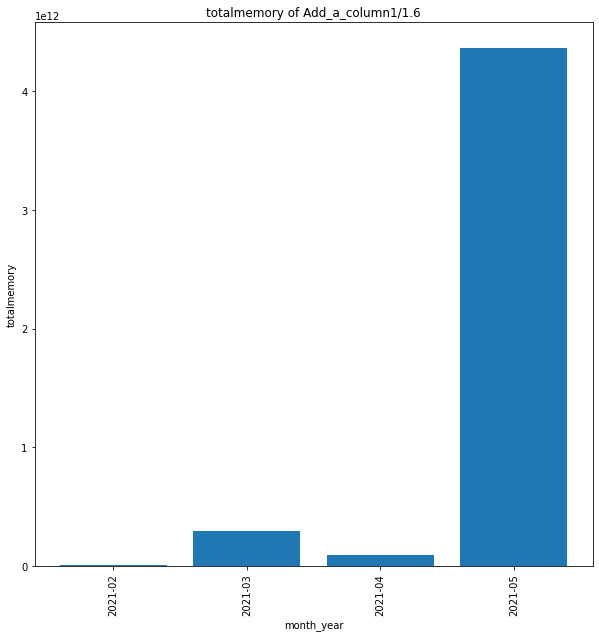

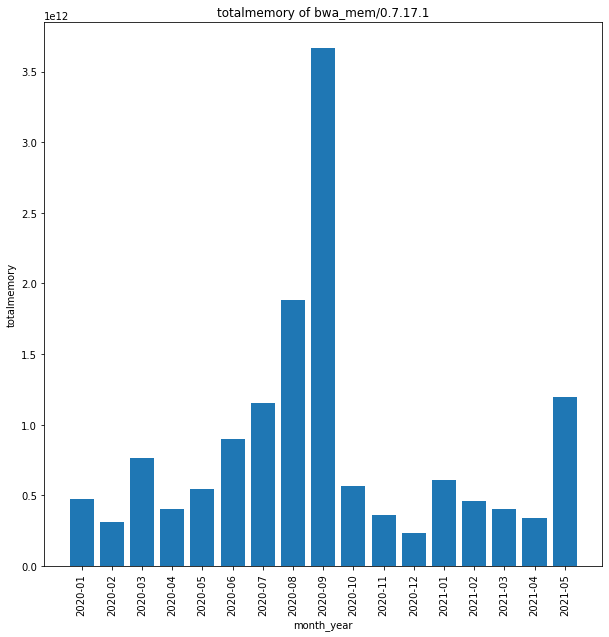

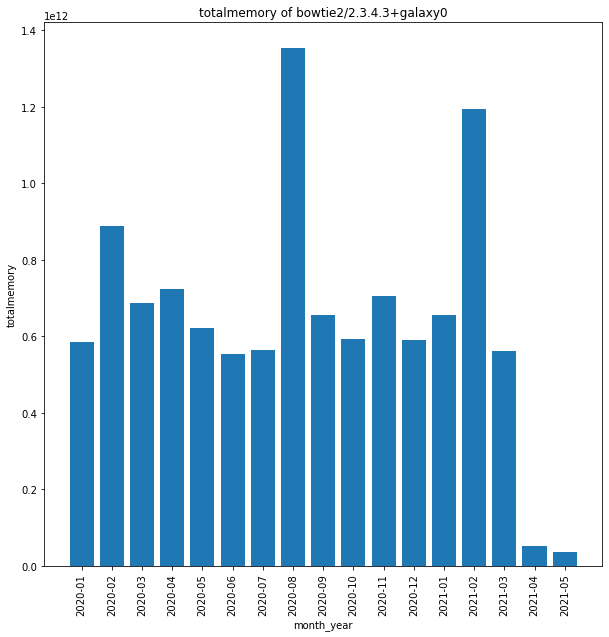

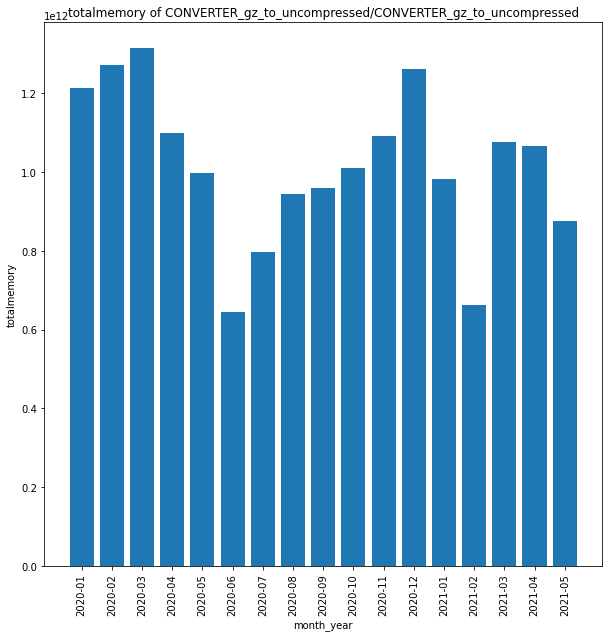

In [59]:
#print(os.listdir())
totalmemory_all = pd.read_csv('../totalmemory_all.csv')
#print(totalmemory_all)
#print(totalmemory_all.columns)
#print(totalmemory_all.shape)
#print(totalmemory_all['totalmemory'])

#totalmemory_all.head(5)
#totalmemory_all['totalmemory']
index = 0
for tool in most_popular_tool_names:
  index += 1
  totalmemory_tool = totalmemory_all.loc[totalmemory_all['tool_name_version'] == tool]
  totalmemory_tool_list = [memory for memory in totalmemory_tool['totalmemory']]
  month_year_tool = totalmemory_tool['month_year']
  month_year_tool_processed = [month_year.replace(' ','') for month_year in list(month_year_tool)]
  plt.figure(figsize = (10,10))
  plt.bar(month_year_tool_processed,totalmemory_tool_list)
  plt.xticks(rotation = 90)

  title = 'totalmemory of ' + tool
  plt.title(title)
  plt.xlabel('month_year')
  plt.ylabel('totalmemory')
  #file_name = "most_popular_tool" + str(index) + "totalmemory"
  #plt.savefig(file_name)


<p align = "justify">
Here, we will plot the number of users across the 10 most popular tools (based on the number of jobs) from January 2020 to May 2021.
</p>

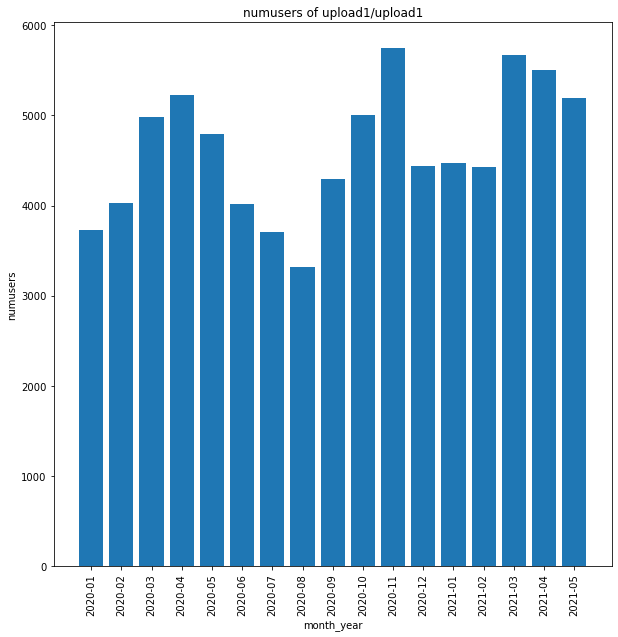

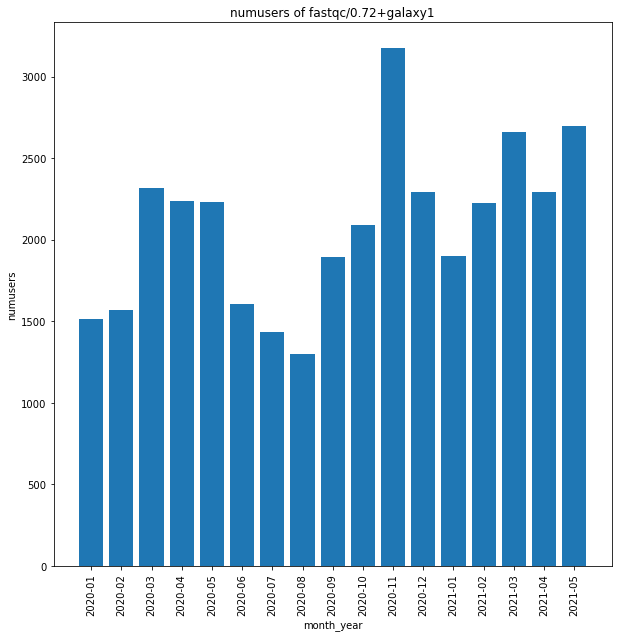

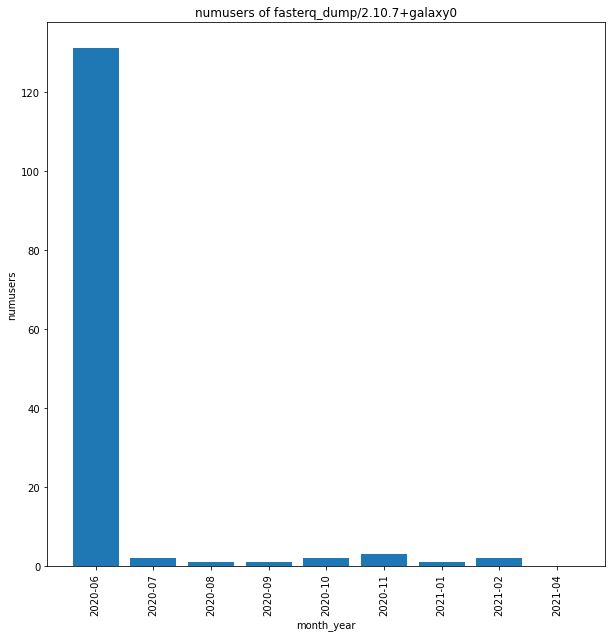

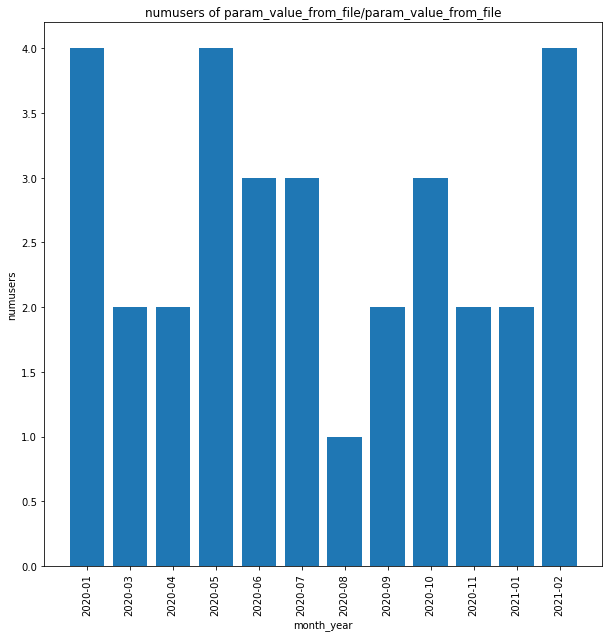

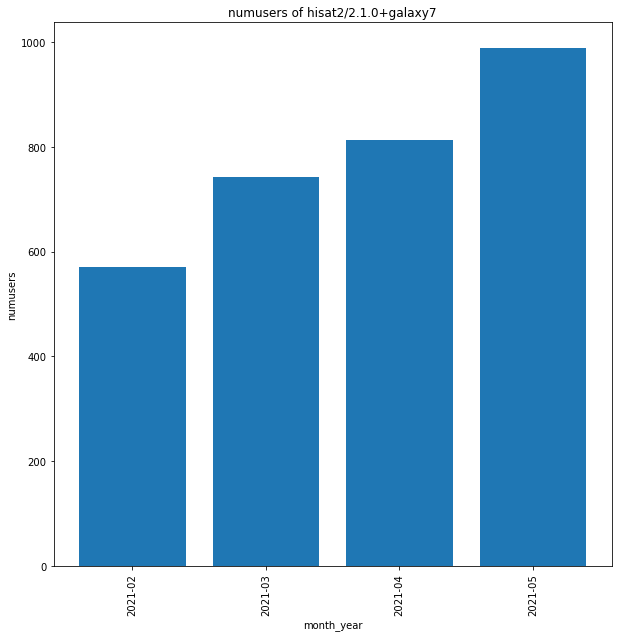

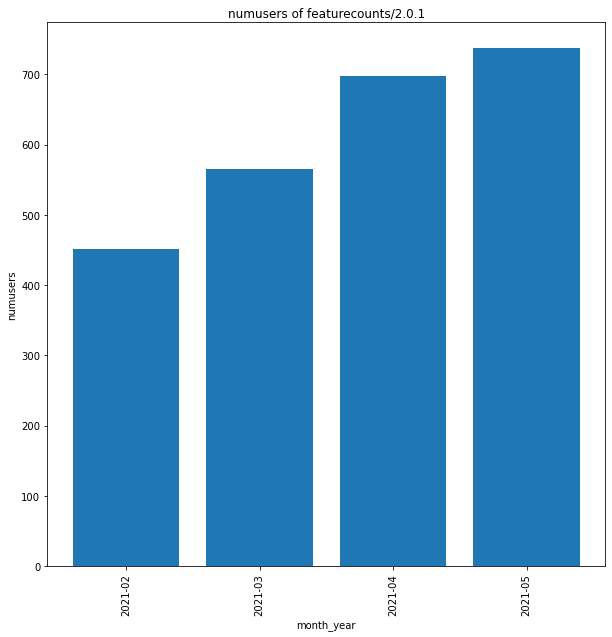

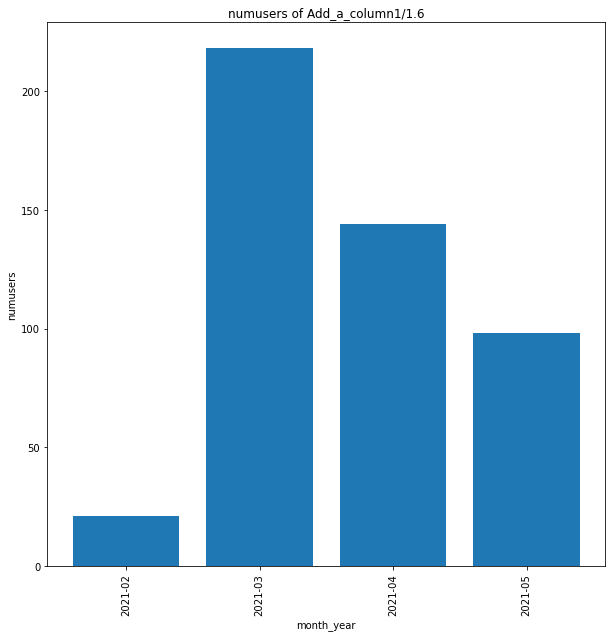

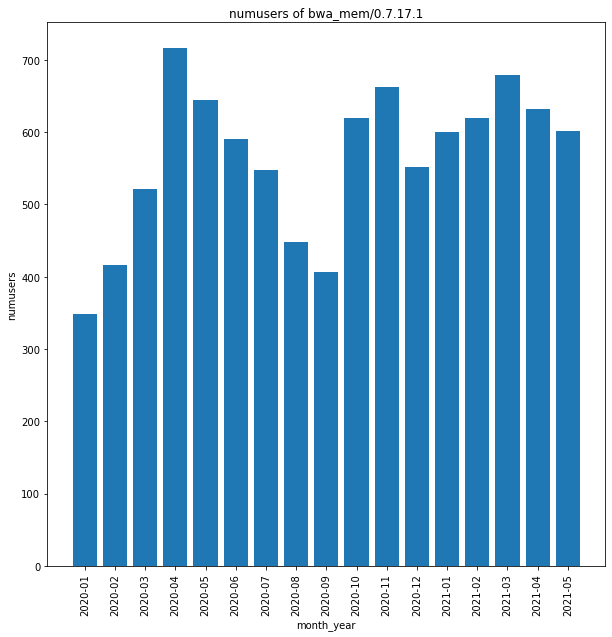

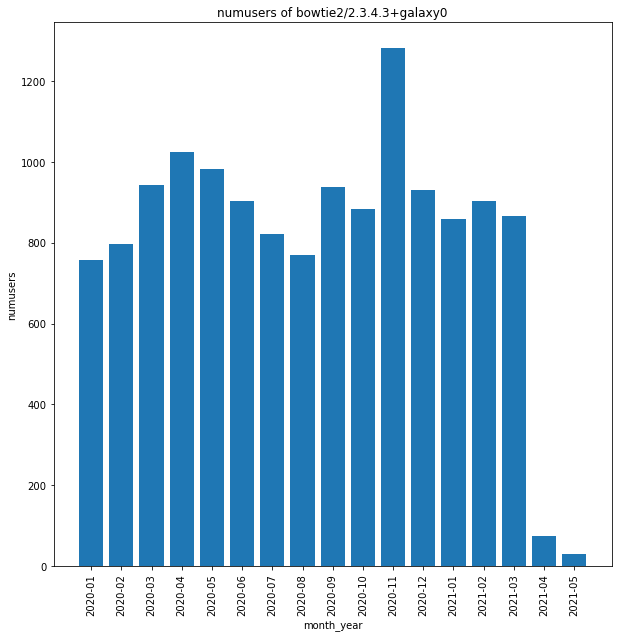

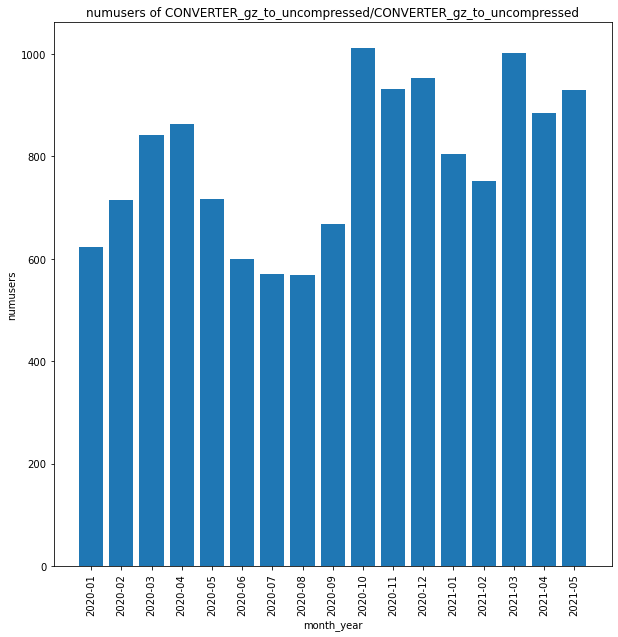

In [60]:
#print(os.listdir())
numusers_all = pd.read_csv('../numusers_all.csv')
#print(totalmemory_all)
#print(numusers_all.columns)
#print(numusers_all.shape)
#print(numusers_all['num_users'])
#numusers_tool = numusers

index = 0
for tool in most_popular_tool_names:
  index += 1
  numusers_tool = numusers_all.loc[numusers_all['tool_name_version'] == tool]
  numusers_tool_list = [numusers for numusers in numusers_tool['num_users']]
  #numusers_tool_list
  month_year_tool = numusers_tool['month_year']
  month_year_tool_processed = [month_year.replace(' ','') for month_year in list(month_year_tool)]
  plt.figure(figsize = (10,10))
  plt.bar(month_year_tool_processed,numusers_tool_list)
  plt.xticks(rotation = 90)

  title = 'numusers of ' + tool
  plt.title(title)
  plt.xlabel('month_year')
  plt.ylabel('numusers')
  file_name = "most_popular_tool" + str(index) + "numusers"

<p align = "justify">
Here, we will plot the number of jobs across the 10 most popular tools (based on the number of jobs) from January 2020 to May 2021.
</p>

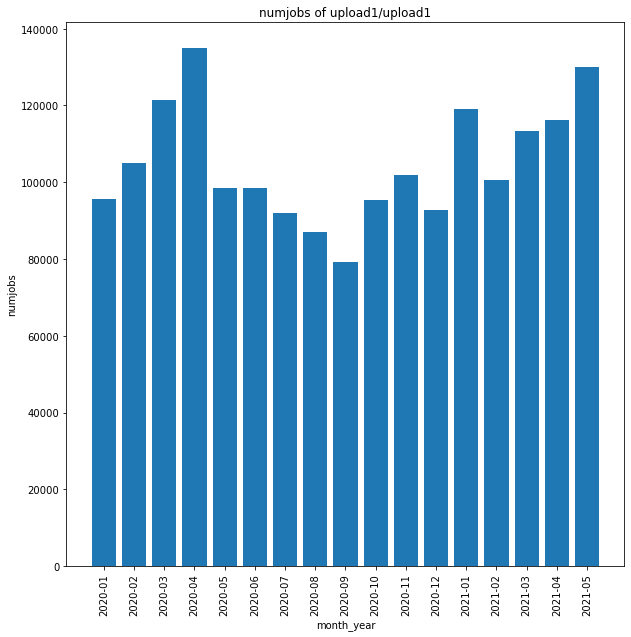

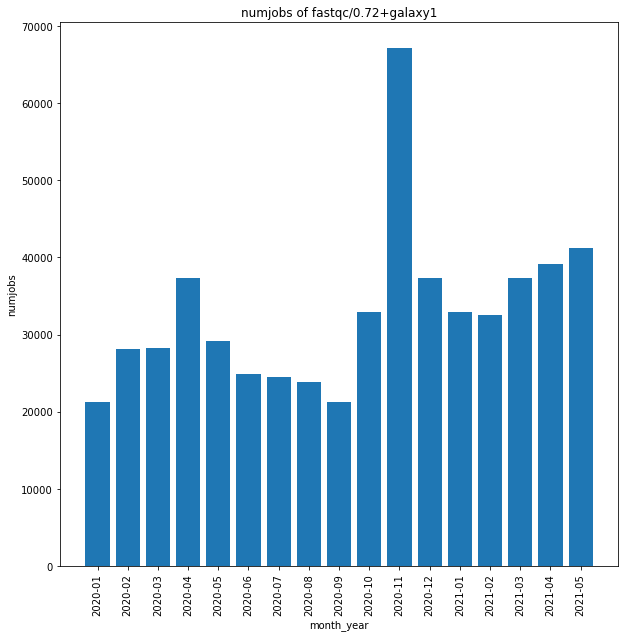

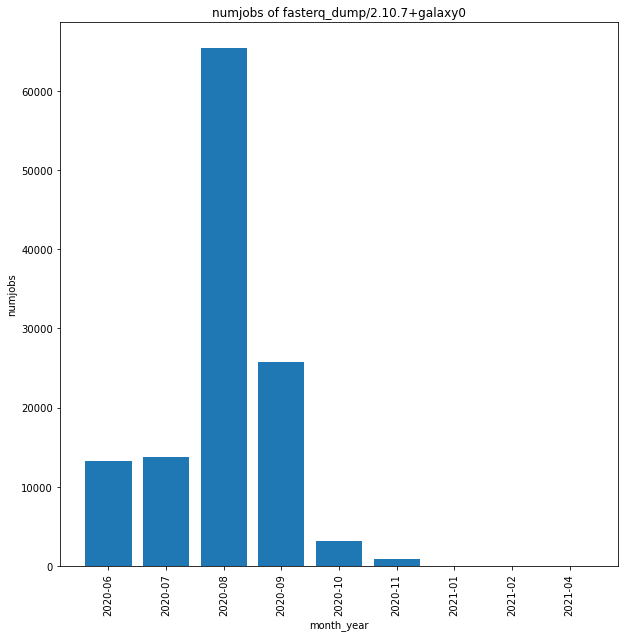

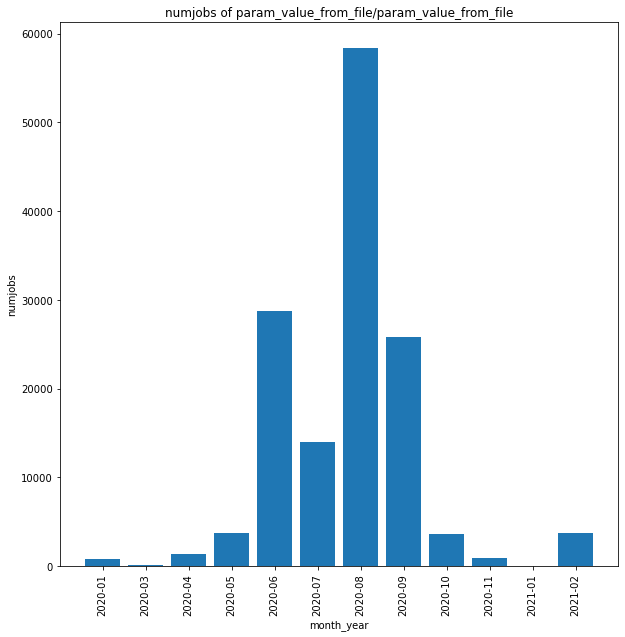

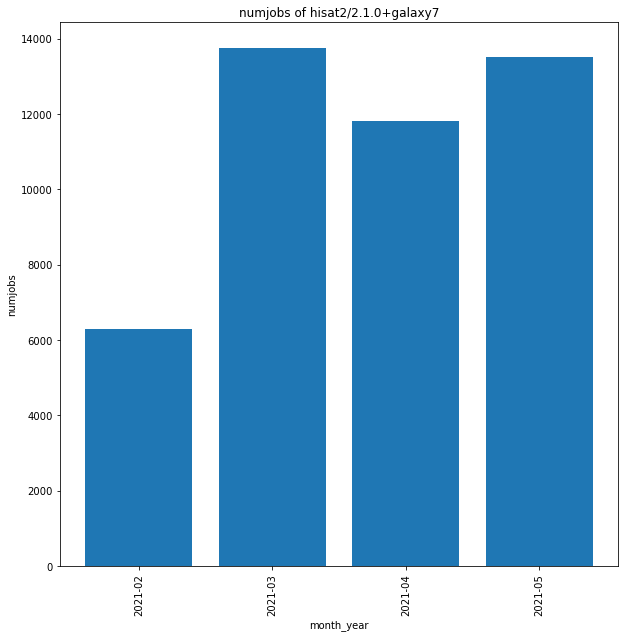

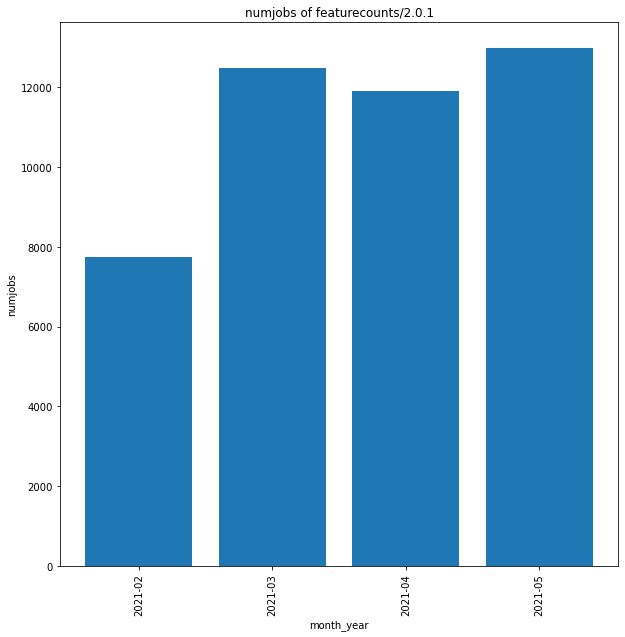

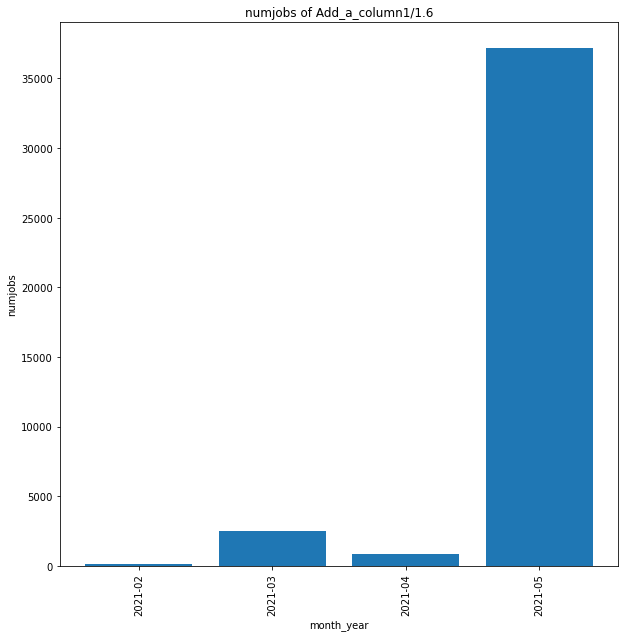

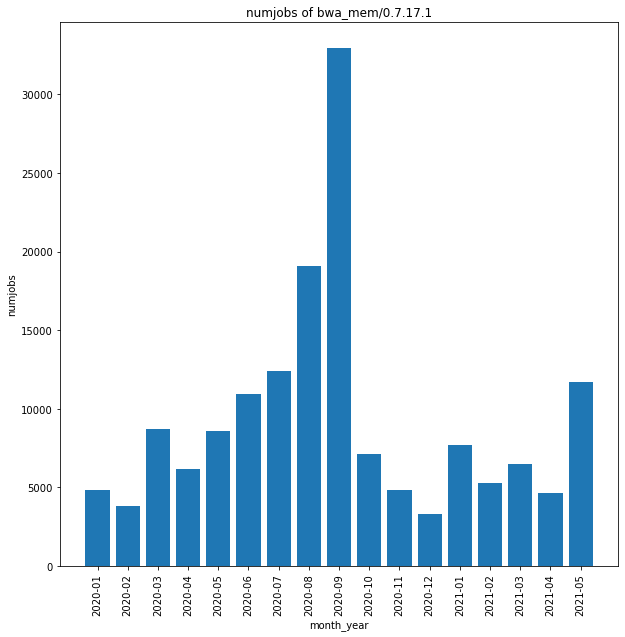

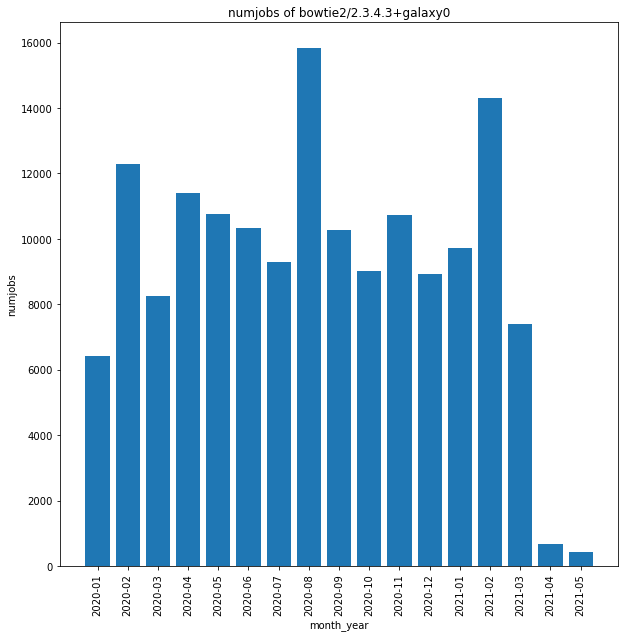

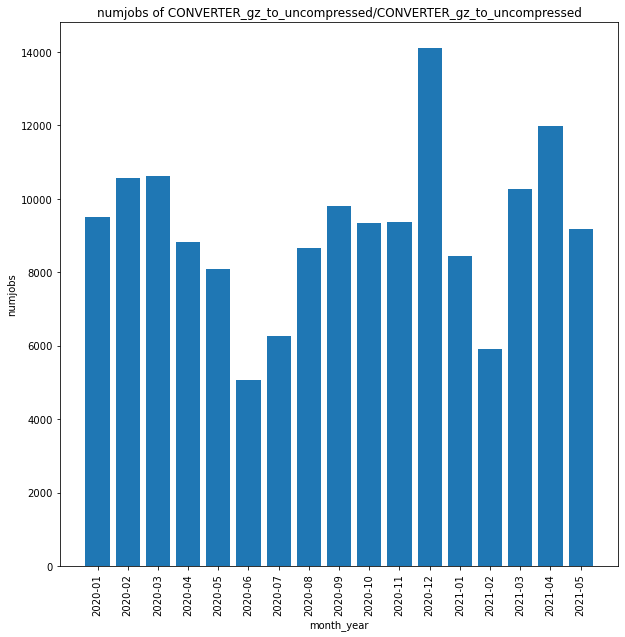

In [61]:
#print(os.listdir())
numjobs_all = pd.read_csv('../numjobs_all.csv')


index = 0
for tool in most_popular_tool_names:
  index += 1
  numjobs_tool = numjobs_all.loc[numjobs_all['tool_name_version'] == tool]
  numjobs_tool_list = [numjobs for numjobs in numjobs_tool['num_jobs']]
  #numusers_tool_list
  month_year_tool = numjobs_tool['month_year']
  month_year_tool_processed = [month_year.replace(' ','') for month_year in list(month_year_tool)]
  plt.figure(figsize = (10,10))
  plt.bar(month_year_tool_processed,numjobs_tool_list)
  plt.xticks(rotation = 90)

  title = 'numjobs of ' + tool
  plt.title(title)
  plt.xlabel('month_year')
  plt.ylabel('numjobs')
  #file_name = "most_popular_tool" + str(index) + "numjobs"
  #plt.savefig(file_name)

<p align = "justify">
Here, we will plot the average cpu time across the 10 most popular tools (based on the number of jobs) from January 2020 to May 2021.
</p>

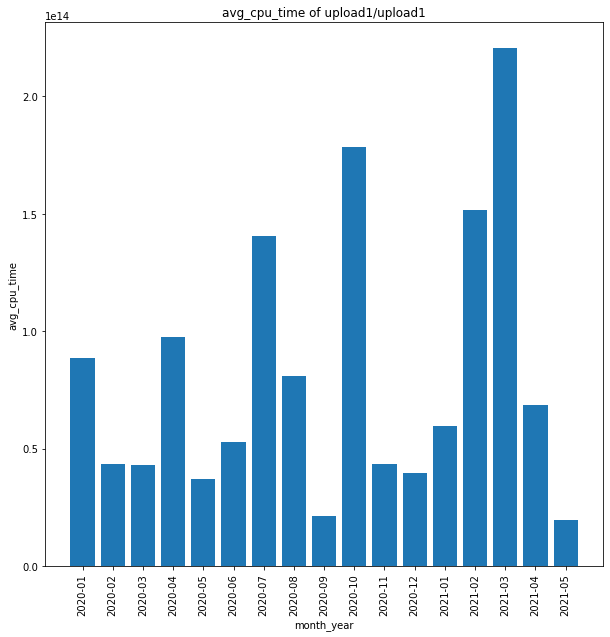

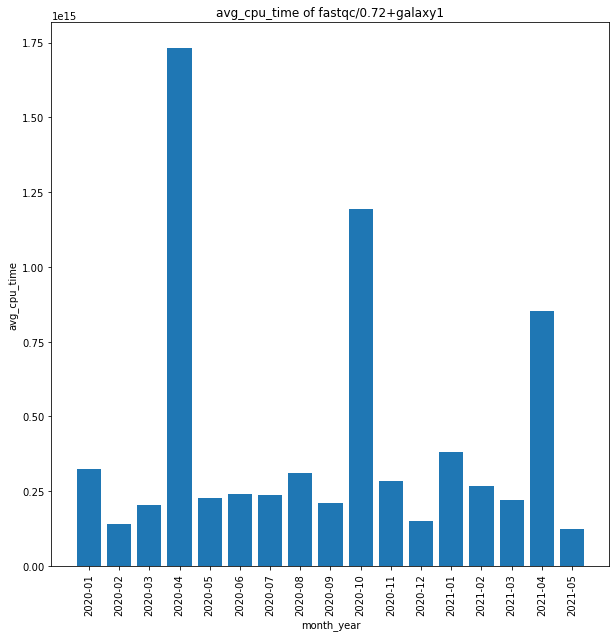

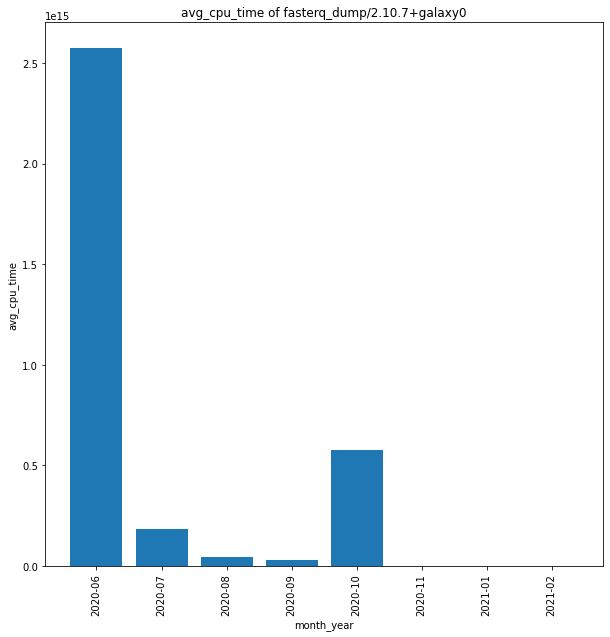

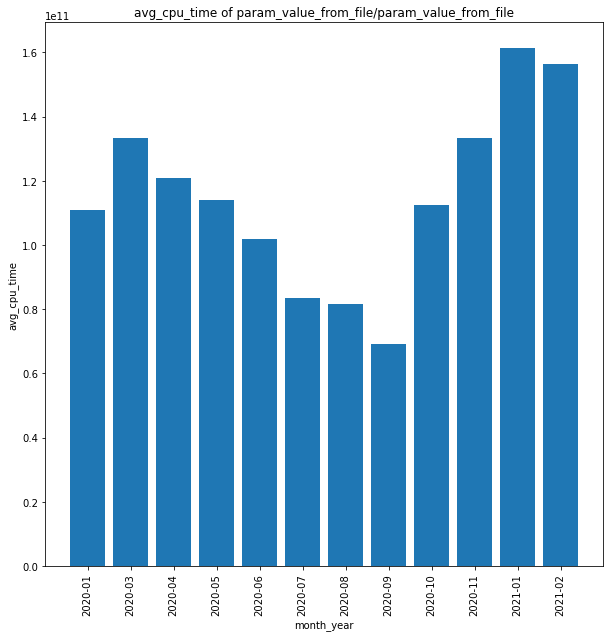

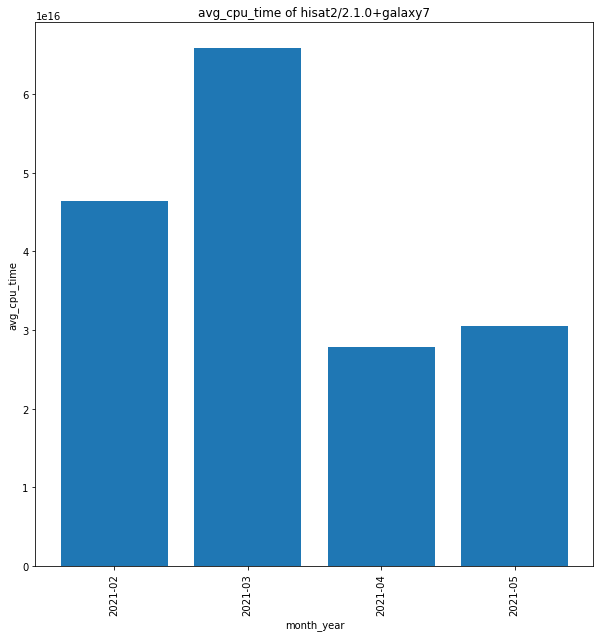

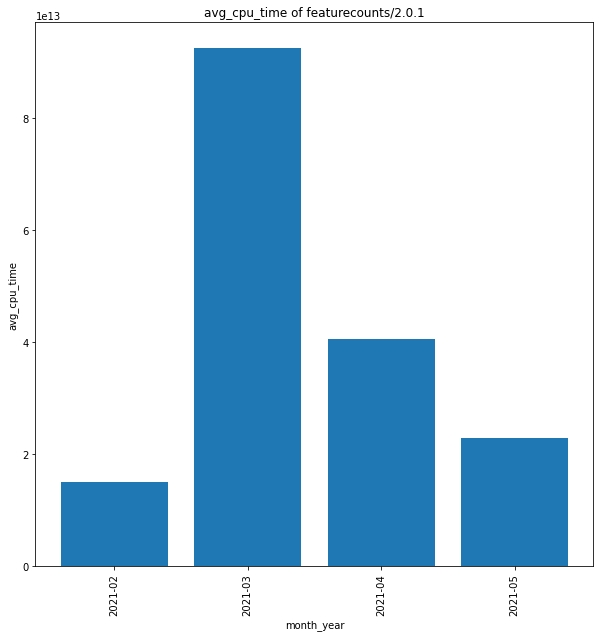

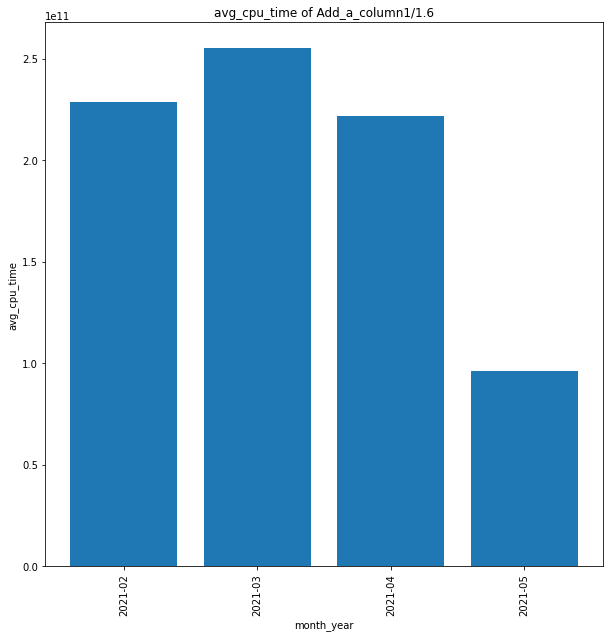

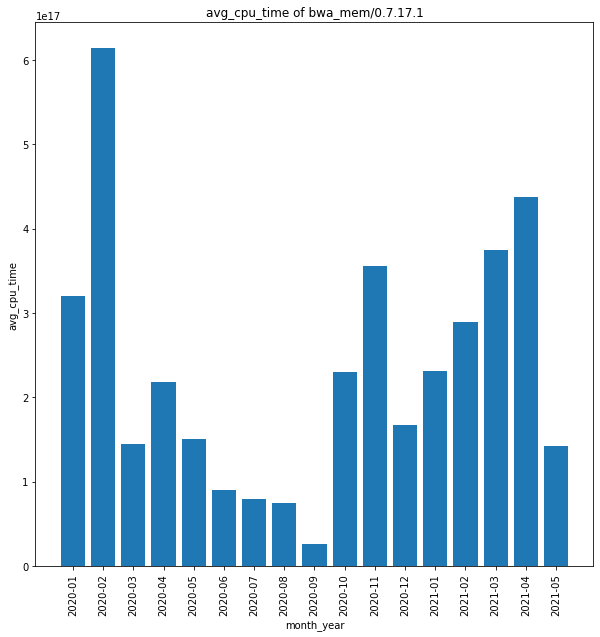

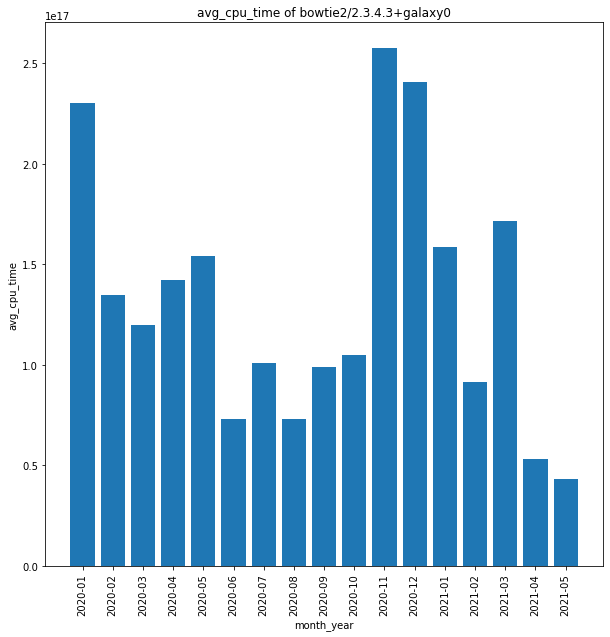

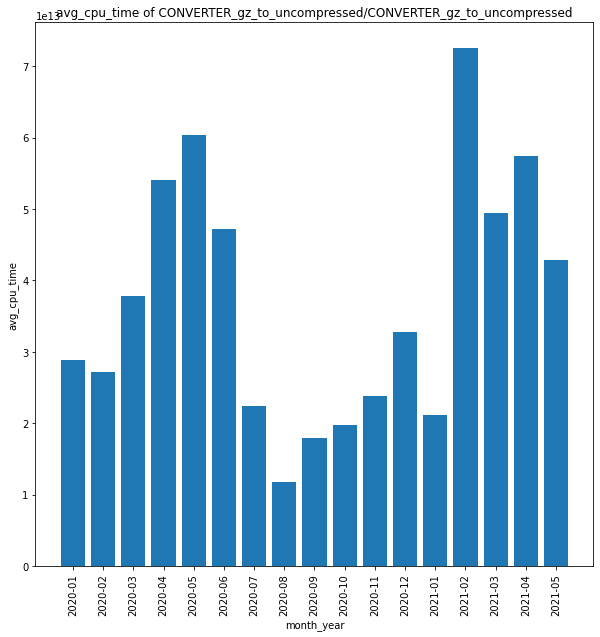

In [62]:
#print(os.listdir())
avg_cpu_time_all = pd.read_csv('../avg_cpu_time_all.csv')
#print(avg_cpu_time_all['avg_cpu_time'])

index = 0
for tool in most_popular_tool_names:
  index += 1
  avg_cpu_time_tool = avg_cpu_time_all.loc[avg_cpu_time_all['tool_name_version'] == tool]
  avg_cpu_time_tool_list = [avg_cpu_time for avg_cpu_time in avg_cpu_time_tool['avg_cpu_time']]
  #numusers_tool_list
  month_year_tool = avg_cpu_time_tool['month_year']
  month_year_tool_processed = [month_year.replace(' ','') for month_year in list(month_year_tool)]
  plt.figure(figsize = (10,10))
  plt.bar(month_year_tool_processed,avg_cpu_time_tool_list)
  plt.xticks(rotation = 90)

  title = 'avg_cpu_time of ' + tool
  plt.title(title)
  plt.xlabel('month_year')
  plt.ylabel('avg_cpu_time')
  #file_name = "most_popular_tool" + str(index) + "avg_cpu_time"
  #plt.savefig(file_name)

<p align = "justify">
Here, we will plot the average memory across the 10 most popular tools (based on the number of jobs) from January 2020 to May 2021.
</p>

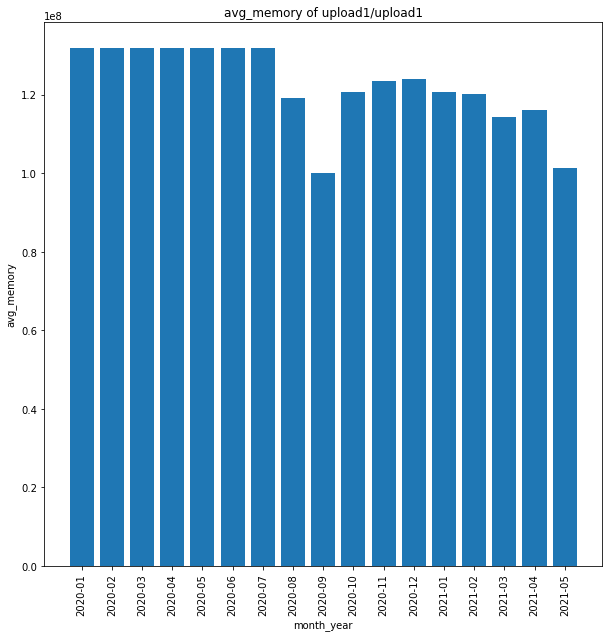

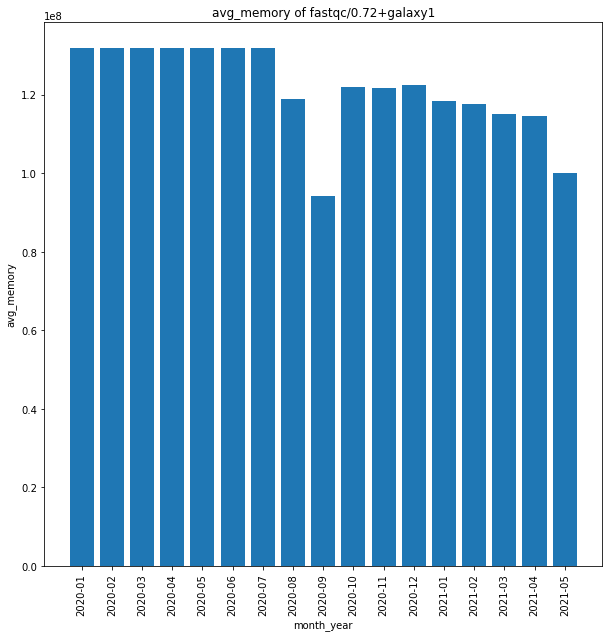

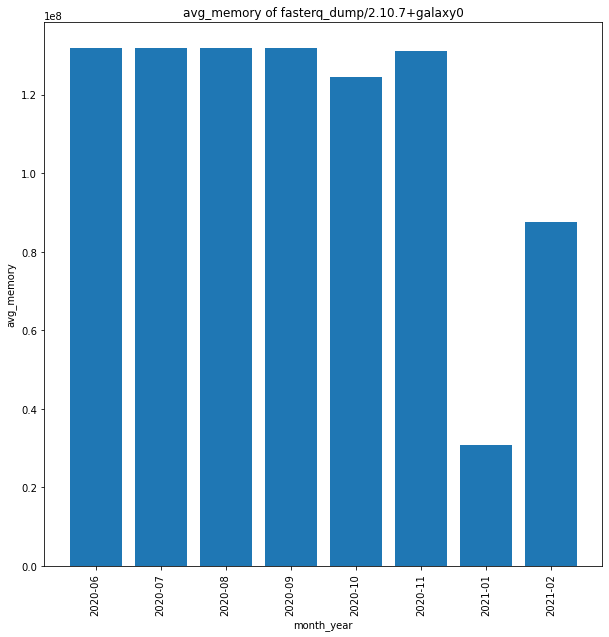

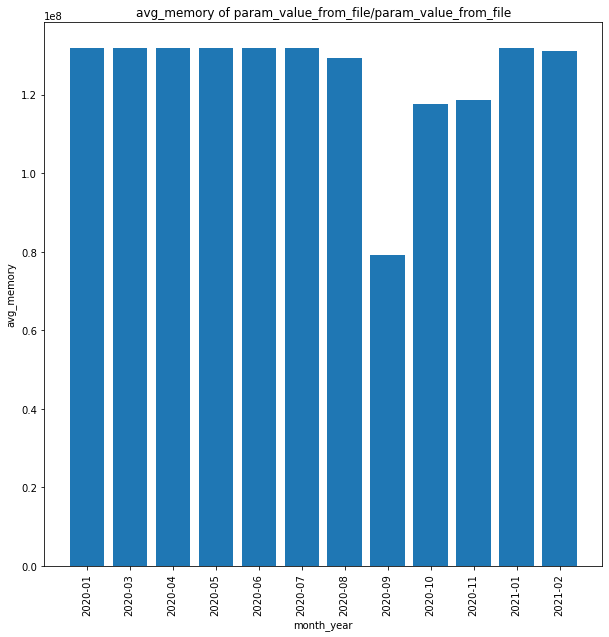

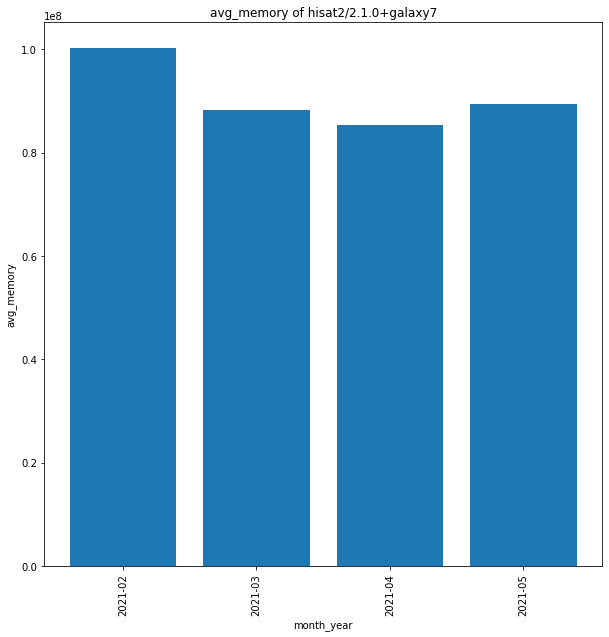

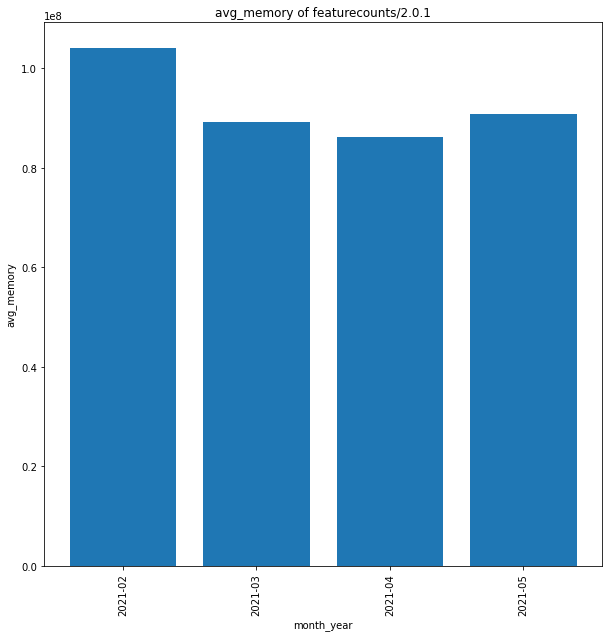

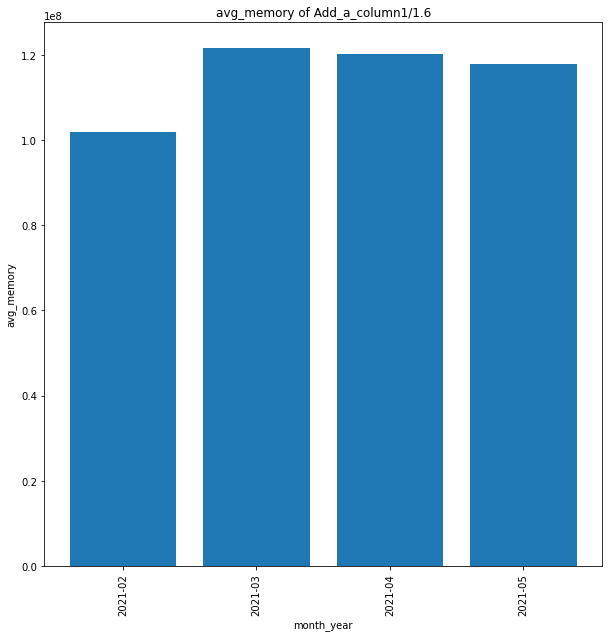

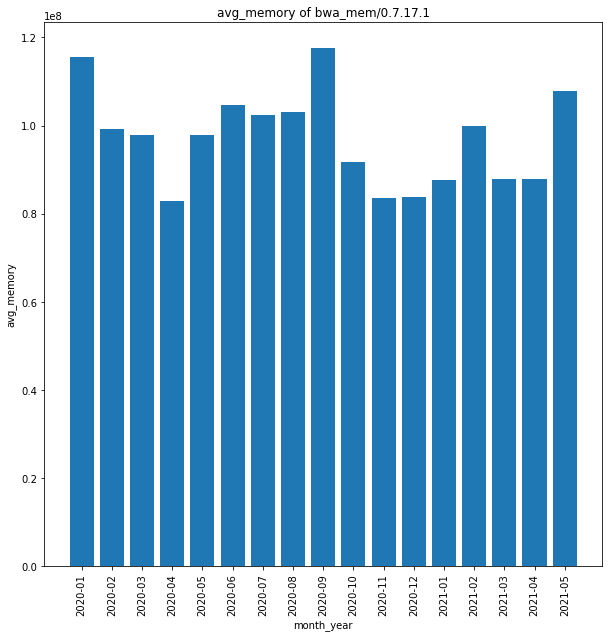

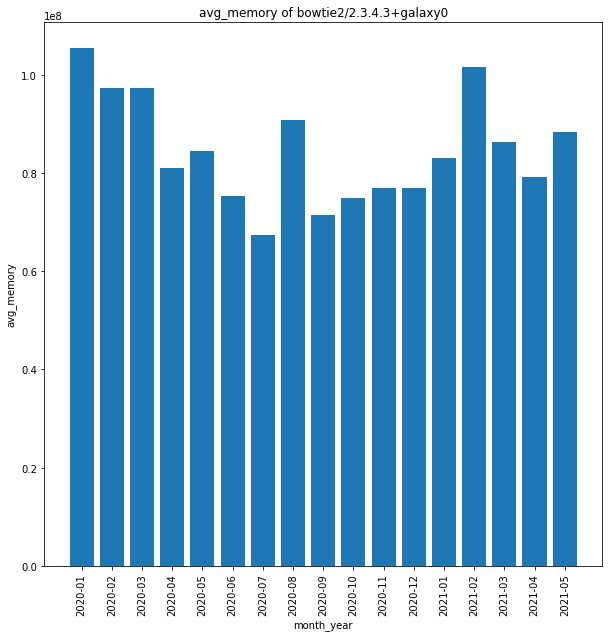

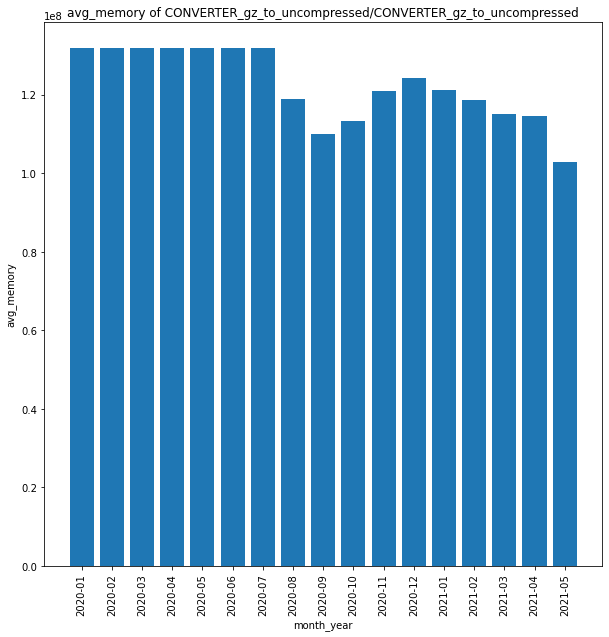

In [63]:
avg_memory_all = pd.read_csv('../avg_memory_all.csv')
#print(avg_cpu_time_all['avg_cpu_time'])

index = 0
for tool in most_popular_tool_names:
  index += 1
  avg_memory_tool = avg_memory_all.loc[avg_memory_all['tool_name_version'] == tool]
  avg_memory_tool_list = [avg_memory for avg_memory in avg_memory_tool['avg_memory']]
  #numusers_tool_list
  month_year_tool = avg_memory_tool['month_year']
  month_year_tool_processed = [month_year.replace(' ','') for month_year in list(month_year_tool)]
  plt.figure(figsize = (10,10))
  plt.bar(month_year_tool_processed,avg_memory_tool_list)
  plt.xticks(rotation = 90)

  title = 'avg_memory of ' + tool
  plt.title(title)
  plt.xlabel('month_year')
  plt.ylabel('avg_memory')
  #file_name = "most_popular_tool" + str(index) + "avg_memory"
  #plt.savefig(file_name)